In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [7]:
fi = datetime(2013, 11, 1)
fa = fi
ff = datetime(2013, 12, 14)
d = (ff - fi).days + 1

dl = 6
n = 0

e = d / dl
m = int(-d * n)
# if d % 2 == 0:
#   m = m + 1

print(f"Días: {d}")
print(f"Media: {m}")
print(f"Desviación estandar: {e}")

Días: 44
Media: 0
Desviación estandar: 7.333333333333333


In [8]:
ajuste = 0
resultados_por_dia = {}
resultados_por_mes = {}

#Recorre y enumera los días gaussianos
while fa <= ff:
   #m = m + 1
   r = e * np.sqrt(2 * np.pi)
   x = np.exp(-0.5 * (m / e) ** 2)
   cantidad = (1 / r) * x
   print(f"m: 23 xm: {m:03} {fa.strftime('%Y-%m-%d')}: {cantidad}")
   resultados_por_dia[fa] = cantidad
   ajuste = ajuste + cantidad
   fa += timedelta(days=1)
   m = m + 1

# fa = fi
# m = 1
# while fa <= ff:
#    r = (d * np.sqrt(2 * np.pi)) / dl
#    x = np.exp(-0.5 * ((m - (d / 2 + 1)) / (d / dl)) ** 2)
#    cantidad = (1 / r) * x
#    print(f"x: {m} dl: {dl} n: {n} {fa.strftime('%Y-%m-%d')}: {cantidad}")
#    resultados_por_dia[fa] = cantidad
#    ajuste = ajuste + cantidad
#    fa += timedelta(days=1)
#  m = m + 1

print(f"Ajuste 1: {ajuste}")
aux1 = ajuste
ajuste = (1 - ajuste) / len(resultados_por_dia)
aux2 = ajuste * len(resultados_por_dia)
print(f"Ajuste 2: {ajuste}")
print(f"Ajuste 3: {aux1 + aux2}")

for dia, cantidad in resultados_por_dia.items():
   resultados_por_dia[dia] = cantidad + ajuste
   #print(f"{dia.strftime('%Y-%m-%d')}: {resultados_por_dia[dia]}")
# for i in range(len(resultados_por_dia)):
#    resultados_por_dia[i] = (resultados_por_dia[i][0], resultados_por_dia[i][1] + ajuste)
   #print(f"{resultados_por_dia[i][0].strftime('%Y-%m-%d')}: {resultados_por_dia[i][1]}")

# for fecha, cantidad in resultados_por_dia:
#    mes = fecha.strftime('%Y-%m')

#    if mes not in resultados_por_mes:
#       resultados_por_mes[mes] = 0
#    resultados_por_mes[mes] += cantidad

m: 23 xm: 000 2013-11-01: 0.05440122005474083
m: 23 xm: 001 2013-11-02: 0.05389776764358059
m: 23 xm: 002 2013-11-03: 0.052415193335080774
m: 23 xm: 003 2013-11-04: 0.05003430624924167
m: 23 xm: 004 2013-11-05: 0.04688164576253794
m: 23 xm: 005 2013-11-06: 0.04311834586045961
m: 23 xm: 006 2013-11-07: 0.038926522758873414
m: 23 xm: 007 2013-11-08: 0.03449478208516583
m: 23 xm: 008 2013-11-09: 0.03000443664136237
m: 23 xm: 009 2013-11-10: 0.02561779961997955
m: 23 xm: 010 2013-11-11: 0.021469525584387774
m: 23 xm: 011 2013-11-12: 0.017661490318076147
m: 23 xm: 012 2013-11-13: 0.014261214873902885
m: 23 xm: 013 2013-11-14: 0.01130342287736409
m: 23 xm: 014 2013-11-15: 0.008794025157399925
m: 23 xm: 015 2013-11-16: 0.006715675578773683
m: 23 xm: 016 2013-11-17: 0.005034032193126626
m: 23 xm: 017 2013-11-18: 0.003703962194312949
m: 23 xm: 018 2013-11-19: 0.002675108357147374
m: 23 xm: 019 2013-11-20: 0.0018964460268763512
m: 23 xm: 020 2013-11-21: 0.001319665528017273
m: 23 xm: 021 2013-11

In [9]:
# Calcular el acumulado
acumulado = {}
total_acumulado = 0

# for mes, cantidad in resultados_por_mes.items():
#     total_acumulado += cantidad
#     acumulado[mes] = total_acumulado
for dia, cantidad in resultados_por_dia.items():
   total_acumulado += cantidad
   acumulado[dia] = total_acumulado

#Simulación de actividad
# acumSimula = {}
# resuSimala = {}

# total_acumulado = 0
# for mes, cantidad in resultados_por_mes.items():
#   fecha = datetime.strptime(mes, "%Y-%m")
#   if fecha > datetime.strptime('2014-11', "%Y-%m"):
#     resuSimala[mes] = None
#     acumSimula[mes] = None
#   else:
#     resuSimala[mes] = cantidad / 1.3
#     total_acumulado += cantidad / 1.3
#     acumSimula[mes] = total_acumulado

# print(resuSimala)

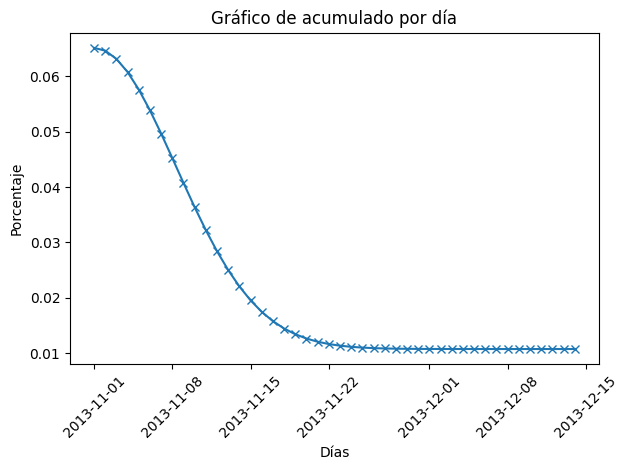

In [10]:
# Crear listas separadas para las claves (meses) y los valores (acumulados)
meses = list(acumulado.keys())
acumulados = list(acumulado.values())
resultados = list(resultados_por_dia.values())
# acumula2 = list(acumSimula.values())
# resulta2 = list(resuSimala.values())

# Crear el gráfico de barras para los valores acumulados
#plt.bar(meses, acumulados)
#plt.plot(meses, acumulados, marker='o')
plt.plot(meses, resultados, marker='x', label='cantidad')
# plt.plot(meses, acumula2, marker='o')
# plt.plot(meses, resulta2, marker='x', label='cantidad')
plt.xlabel("Días")
plt.ylabel("Porcentaje")
plt.title("Gráfico de acumulado por día")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()